In [4]:
import numpy as np
import matplotlib as plt
import pandas as pd

shooting_df = pd.read_csv("../data/Shootings.csv")
shooting_df


,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t
...,...,...,...,...,...,...,...,...
1791,232011907,2023-02-13 20:08:00+00,B2,Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1792,232011907,2023-02-13 20:08:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1793,232012721,2023-02-16 18:13:00+00,B2,Non-Fatal,Male,White,Hispanic or Latinx,f
1794,232013356,2023-02-18 21:43:00+00,B3,Fatal,Female,Black or African American,Unknown,f


The dataframe above is a csv file posted on the boston.gov website that shows information on shootings within the city of Boston that fall under Boston Police Department jurisdiction. This dataframe contains information from 2015 and on with a 7 day rolling delay.

In [5]:

df1 = shooting_df.copy()
dist4 = '|'.join(['B2','B3','C11','E13'])
other = '|'.join(['A15','A1','A7','C6','D4','D14','E5','E18'])
df1['district'] = df1['district'].str.replace(dist4, 'District 4')
df1['district'] = df1['district'].str.replace(other, 'Not District 4')

df1

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,Not District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,Not District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,District 4,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t
...,...,...,...,...,...,...,...,...
1791,232011907,2023-02-13 20:08:00+00,District 4,Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1792,232011907,2023-02-13 20:08:00+00,District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1793,232012721,2023-02-16 18:13:00+00,District 4,Non-Fatal,Male,White,Hispanic or Latinx,f
1794,232013356,2023-02-18 21:43:00+00,District 4,Fatal,Female,Black or African American,Unknown,f


Because we are looking specifically at the shootings in District 4 vs. all other districts, I decided to make it easier on myself and change the district column to either 'District 4' or 'Not District 4' depending upon where the incident occurred. This way we can easily compare the probability of shootings that occurred within District 4 vs. outside District 4.

Percentage of Shootings in District 4 since 2015: 80.90
Percentage of Shootings in All Other Districts since 2015: 19.10
Total Percentage: 100.00


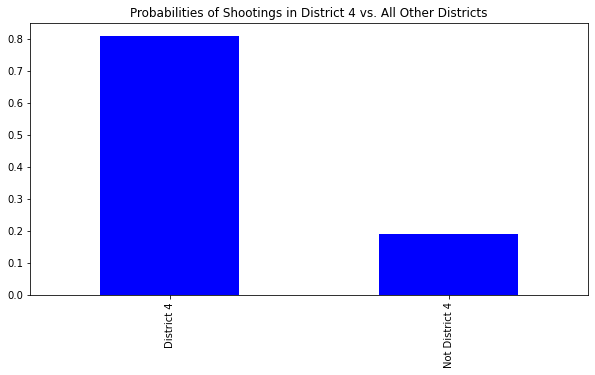

In [27]:
probabilities_sh = df1['district'].value_counts(normalize=True)
print('Percentage of Shootings in District 4 since 2015: %.2f' % (probabilities_sh[0]*100))
print('Percentage of Shootings in All Other Districts since 2015: %.2f' % (probabilities_sh[1]*100))
print('Total Percentage: %.2f' % ((probabilities_sh[0] + probabilities_sh[1])*100))
probabilities_sh.plot(kind='bar', figsize=(10,5), color='blue', title='Probabilities of Shootings in District 4 vs. All Other Districts')

Above is a bar graph that shows the information on shootings that have occurred within District 4 vs. outside District 4. As we can see, about 80% of all shootings occur within District 4.

In [7]:
shotsfired_df = pd.read_csv("../data/ShotsFired.csv")
shotsfired_df.head()

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f


In [8]:
df2 = shotsfired_df.copy()
print(df2['district'].unique())
df2['district'] = df2['district'].str.replace(dist4, 'District 4')
df2['district'] = df2['district'].str.replace(other, 'Not District 4')
print(df2['district'].unique())
df2.dropna(subset=['district'],inplace=True)
print(df2['district'].unique())

['C11' 'A15' 'B3' 'B2' 'E13' 'C6' 'A1' 'A7' 'E18' 'D4' 'E5' nan 'D14']
['District 4' 'Not District 4' nan]
['District 4' 'Not District 4']


Above we do the same thing that we did for the last dataframe, we turn all the different police districts into either 'District 4' or 'Not District 4' and also eliminate any NaN values that may disrupt the data.


Percentage of Shots Fired in District 4 since 2015: 81.55
Percentage of Shots Fired in All Other Districts since 2015: 18.45
Total Percentage: 100.00


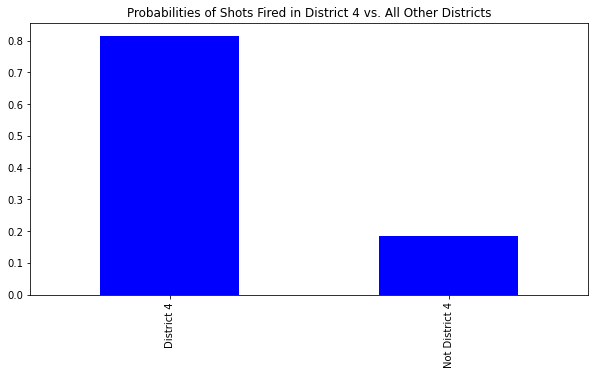

In [28]:
probabilities_sf = df2['district'].value_counts(normalize=True)
print('Percentage of Shots Fired in District 4 since 2015: %.2f' % (probabilities_sf[0]*100))
print('Percentage of Shots Fired in All Other Districts since 2015: %.2f' % (probabilities_sf[1]*100))
print('Total Percentage: %.2f' % ((probabilities_sf[0] + probabilities_sf[1])*100))
probabilities_sf.plot(kind='bar', figsize=(10,5), color='blue', title='Probabilities of Shots Fired in District 4 vs. All Other Districts')

The graph above shows the percentage of shots fired within District 4 vs. all the other districts.